# Introduction to Linear Regression

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**First  example: **

It is about advertising!


In [84]:
# read data into a DataFrame
data = pd.read_csv('http://pythontrade.com/public/Data/pro2/adv.csv',index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper
- independent variables, predictors

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [85]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

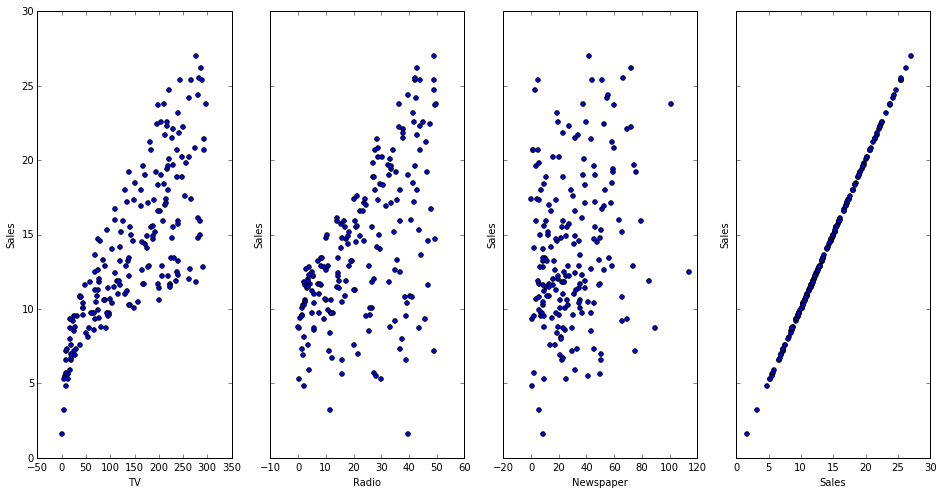

In [86]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0],figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])
data.plot(kind='scatter', x='Sales', y='Sales', ax=axs[3])

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Simple Linear Regression Model

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x+\epsilon$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x
- $\epsilon$ is noise.

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Prediction Equation (Least square)

$$\hat{y}=b_0+b_1x$$

- $\hat{y}$: predicted value
- $b_0$:estimated value of $\beta_0$
- $b_1$:estimated value of $\beta_1$

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors", **SSE**):
$$
SSE=\sum_{i=1}^n(y_i-\hat{y}_i)^2
$$

<img src="http://pythontrade.com/public/PIC/ISOM2500/regession/sse.PNG">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="http://pythontrade.com/public/PIC/ISOM2500/regession/slope_intercept.png">

Let's use **Statsmodels** to estimate the model coefficients for the advertising data:

In [87]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
print lm.params[0]
print lm.params[1]
print lm.params
print lm.params[0]+lm.params[1]*2

7.03259354913
0.047536640433
Intercept    7.032594
TV           0.047537
dtype: float64
7.12766682999


$$\hat{y}=7.033+0.048*x$$

## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [88]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of **9,409 widgets** in that market.

Of course, we can also use Statsmodels to make the prediction:

In [89]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X= pd.DataFrame({'TV': [100,200]})
X.head()

,TV
0,100
1,200


In [90]:
# use the model to make predictions on a new value
print lm.predict(X)


[ 11.78625759  16.53992164]


## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [91]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data['TV'].min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [92]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([  7.0658692 ,  21.12245377])

**Practice:** we want to predict your final scores given hours you spent in this course weekly. Suppose X is an array of hours students from previous semesters Y is an array of scores.

In [93]:
X=[1,1,1,2,2,3,4,5,6,6,7,8,9,1,1,1,2,4,5,5,20,16,15,15,6]
Y=[50,60,60,55,55,60,70,65,70,85,85,85,50,55,40,50,70,60,70,75,100,90,85,90,60]
print len(X),len(Y)

25 25


In [94]:
data1=pd.DataFrame()
data1['hours']=X
data1['score']=Y
print data1.head()

   hours  score
0      1     50
1      1     60
2      1     60
3      2     55
4      2     55


In [99]:
lm = smf.ols(formula='score ~ hours', data=data1).fit()
print lm.params
print lm.conf_int()
print lm.pvalues

Intercept    54.192875
hours         2.329987
dtype: float64
                   0          1
Intercept  48.334551  60.051198
hours       1.584052   3.075923
Intercept    1.263046e-15
hours        1.358123e-06
dtype: float64


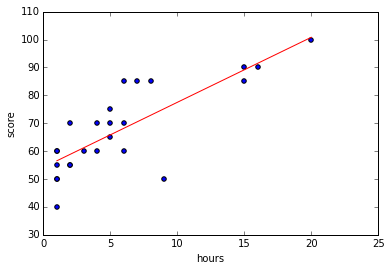

In [96]:
# first, plot the observed data
data1.plot(kind='scatter', x='hours', y='score')

# then, plot the least squares line
X_new1 = pd.DataFrame({'hours': [data1.hours.min(), data1.hours.max()]})
preds1 = lm.predict(X_new1)
plt.plot(X_new1, preds1, c='red', linewidth=1)

## Computational formula for etimation
Our target is to choose $b_0,b_1$ to minimize **SSE**, that is 
$$
SSE=\sum_{i=1}^n(y_i-b_0-b_1x_i)^2
$$

$$
b_1=\frac{S_{XY}}{S_{XX}}, b_0=\bar{y}-b_1\bar{x}
$$
where $S_{XX}=\sum_{i=1}^n(x_i-\bar{x})^2$, $S_{XY}=\sum_{i=1}^n[(y_i-\bar{y})(x_i-\bar{x})]$

We need to define two functions to compute $S_{XY},S_{XX}$


In [97]:
def Sxy(x,y):

SyntaxError: unexpected EOF while parsing (<ipython-input-97-0d66c65fa7b6>, line 1)

In [ ]:
def Sxx(x,y):

In [ ]:
def b1(x,y):

In [ ]:
def b0(x,y):